In [1]:
import numpy as np
from skimage import io, data, transform, util, filters, color, exposure, restoration
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_float64, img_as_ubyte
from scipy import ndimage, fft

In [2]:
def mapping(img):
    nimg = img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

In [3]:
def mapping_float(img):
    nimg = img.copy()
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

In [4]:
def show(img_list, caption_list):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        ax[i].imshow(img_list[i], cmap='gray')
        ax[i].set_title(caption_list[i])
   

In [5]:
def my_mesh(mat):
    lin, col = mat.shape[:2]
    x, y = np.ogrid[0:lin, 0:col]
    ax = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')

    ax.plot_surface(x, y, mat, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

In [6]:
def gridFourier(M, N):
    u = np.arange(0, M)
    v = np.arange(0, N)
 
    u = u - np.floor(M/2)
    v = v - np.floor(N/2)
    U, V = np.meshgrid(u, v)
    return U, V

# Gaussian Noise

Ref:   https://www.kaggle.com/code/chanduanilkumar/adding-and-removing-image-noise-in-python/notebook

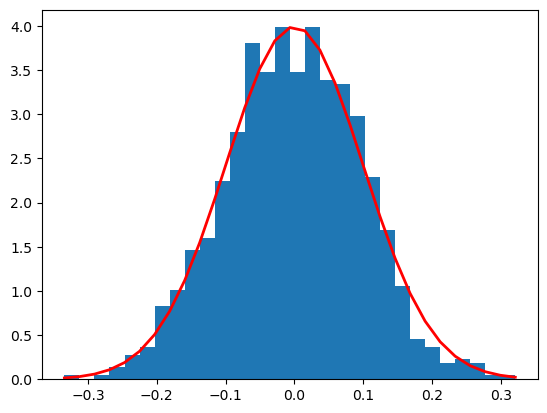

In [12]:
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
f_gaussiana = 1/(sigma * np.sqrt(2 * np.pi)) *  np.exp( - (bins - mu)**2 / (2 * sigma**2) )
plt.plot(bins, f_gaussiana, linewidth=2, color='r')

## Imagem com ruido Gaussiano

In [13]:
def GaussianNoise(img, mu=0, sigma=0.01):
    lin, col = img.shape[:2]
    img_f = img_as_float(img)
    nimg = img_f + np.sqrt(sigma) * np.random.normal(size=(lin, col)) + mu
    return nimg


In [14]:
img = data.chelsea()
imgg = color.rgb2gray(img)

<p>
<b>skimage.util.random_noise</b>(image, mode='gaussian', seed=None, clip=True, **kwargs): Function to add random noise of various types to a floating-point image.

<ul>
    <li> image: ndarray. Input image data. Will be converted to float.</li>
    <li> mode: str, optional. One of the following strings, selecting the type of noise to add:</li>
        <ul>
        <li> ‘gaussian’ Gaussian-distributed additive noise.</li>
        <li> ‘localvar’ Gaussian-distributed additive noise, with specified local variance at each point of image.</li>
        <li> ‘poisson’ Poisson-distributed noise generated from the data.</li>
        <li> ‘salt’ Replaces random pixels with 1.</li>
        <li> ‘pepper’ Replaces random pixels with 0 (for unsigned images) or -1 (for signed images).</li>
        <li> ‘s&p’ Replaces random pixels with either 1 or low_val, where low_val is 0 for unsigned images or -1 for signed images.</li>
        <li> ‘speckle’ Multiplicative noise using out = image + n*image, where n is Gaussian noise with specified mean & variance.</li>
        </ul>
    <li> seed: {None, int, numpy.random.Generator}, optional. If seed is None the numpy.random.Generator singleton is used. If seed is an int, a new Generator instance is used, seeded with seed. If seed is already a Generator instance then that instance is used. This will set the random seed before generating noise, for valid pseudo-random comparisons.</li>
    <li> clip: bool, optional. If True (default), the output will be clipped after noise applied for modes ‘speckle’, ‘poisson’, and ‘gaussian’. This is needed to maintain the proper image data range. If False, clipping is not applied, and the output may extend beyond the range [-1, 1].</li>
    <li> mean: float, optional. Mean of random distribution. Used in ‘gaussian’ and ‘speckle’. Default : 0.</li>
    <li> var: float, optional. Variance of random distribution. Used in ‘gaussian’ and ‘speckle’. Note: variance = (standard deviation) ** 2. Default : 0.01</li>
    <li> local_vars: ndarray, optional. Array of positive floats, same shape as image, defining the local variance at every image point. Used in ‘localvar’.</li>
    <li> amount: float, optional. Proportion of image pixels to replace with noise on range [0, 1]. Used in ‘salt’, ‘pepper’, and ‘salt & pepper’. Default : 0.05</li>
    <li> salt_vs_pepper: float, optional. Proportion of salt vs. pepper noise for ‘s&p’ on range [0, 1]. Higher values represent more salt. Default : 0.5 (equal amounts)</li>
</ul>

Returns
<ul>
<li> out: ndarray. Output floating-point image data on range [0, 1] or [-1, 1] if the input image was unsigned or signed, respectively.</li>
</ul>
</p>


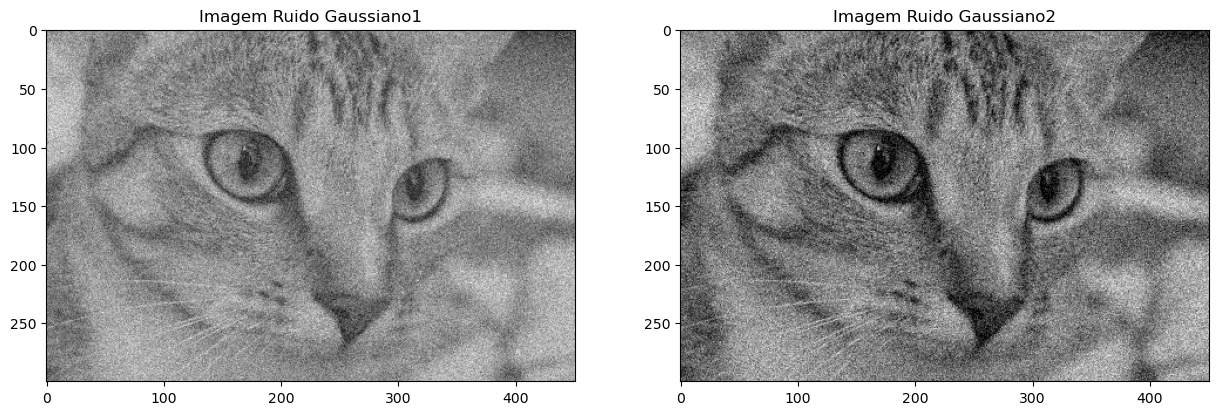

In [16]:
nimg = GaussianNoise(imgg)
nimg2 = util.random_noise(imgg, mode='gaussian')
show([nimg, nimg2], ['Imagem Ruido Gaussiano1', 'Imagem Ruido Gaussiano2'])

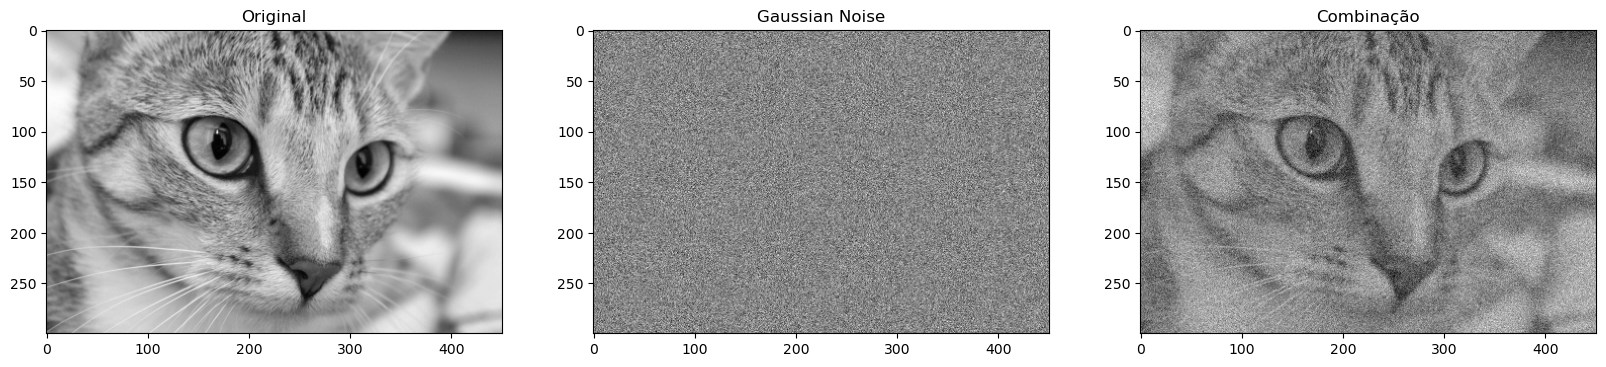

In [17]:
img = data.chelsea()
imgg = color.rgb2gray(img)
lin, col = img.shape[:2]
gauss_noise = np.random.normal(loc=0,scale=0.2,size=(lin,col))
nimg = img_as_float(imgg) + gauss_noise*0.5

show([imgg, gauss_noise, nimg], ['Original','Gaussian Noise','Combinação'])

# Ruido Uniforme

In [27]:
def RuidoUniforme(m,a=0, b=1):
    return a + (b-a)*np.random.random(m)

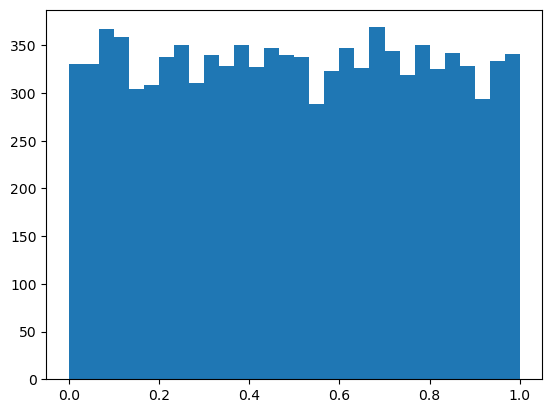

In [29]:
count, bins, ignored=plt.hist(RuidoUniforme(10000, 0, 1), 30)

In [16]:
print(RuidoUniforme(5, 0, 1) )
print(RuidoUniforme(5, 10, 90) )

[0.67287053 0.93312134 0.96285884 0.00576176 0.93667674]
[13.35380641 13.52065371 80.67346628 28.63295845 13.17949131]


## Ruido Uniforme

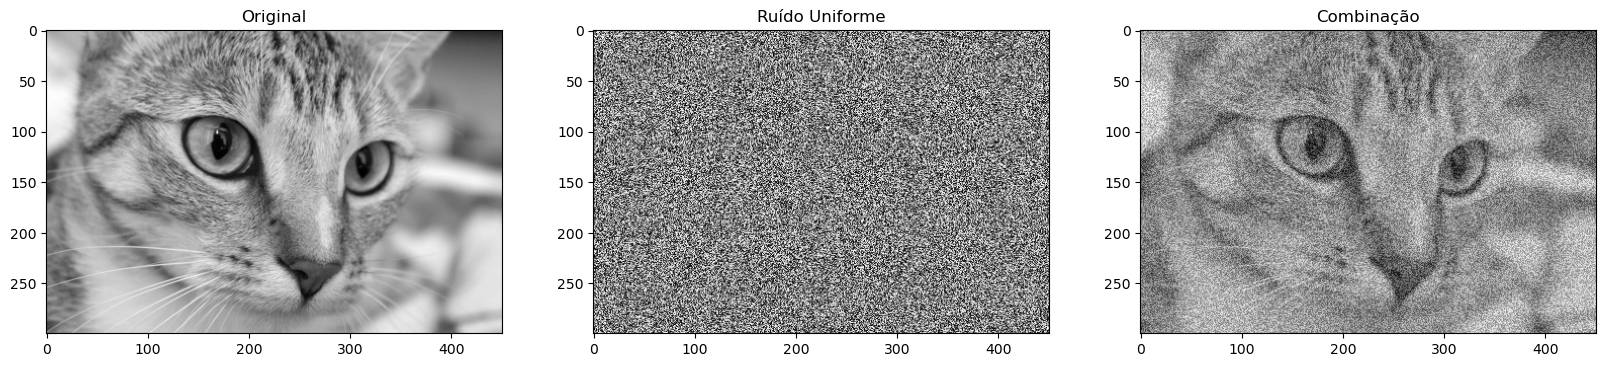

In [18]:
img = data.chelsea()
imgg = color.rgb2gray(img)
lin, col = img.shape[:2]
uni_noise = np.random.random(size = (lin, col))
uni_img = img_as_float(imgg) + uni_noise*0.5
show([imgg, uni_noise, uni_img], ['Original','Ruído Uniforme','Combinação'])


# Ruido sal e pimenta

In [19]:
def salt_pepper_noise(img, p = 0.05):
    nimg = img_as_float(img, force_copy=True)
    x = np.random.random(size = img.shape)
    nimg[x < p/2] = 0
    nimg[np.logical_and(x >= p/2, x < p)] = 1
    return nimg

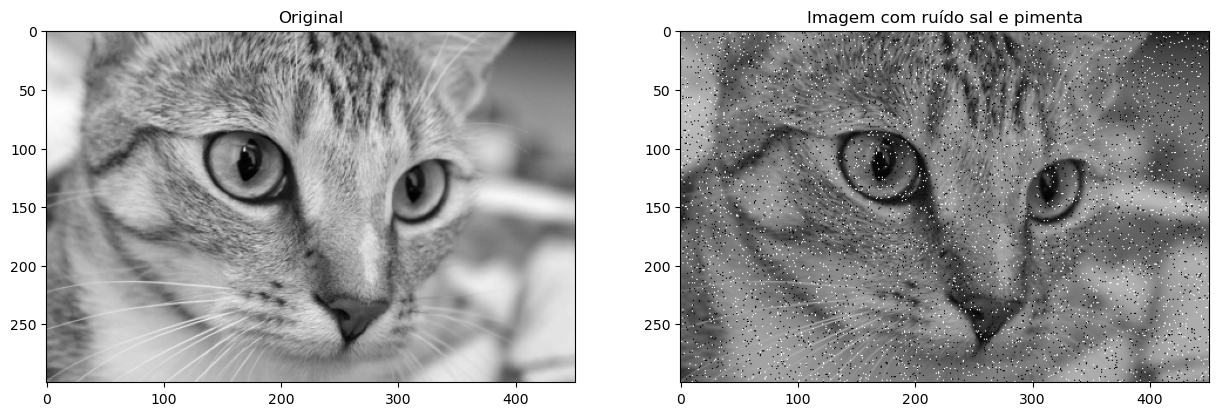

In [21]:
s_p_img = salt_pepper_noise(imgg)
show([imgg, s_p_img], ['Original','Imagem com ruído sal e pimenta'])


## Ruido Rayleigh

In [22]:
def ruido_rayleigh(m=1, n=1, a=0, b=1):
    return a + (-b * np.log( 1 - np.random.random(size=(m,n)) ) ) ** (1/2)

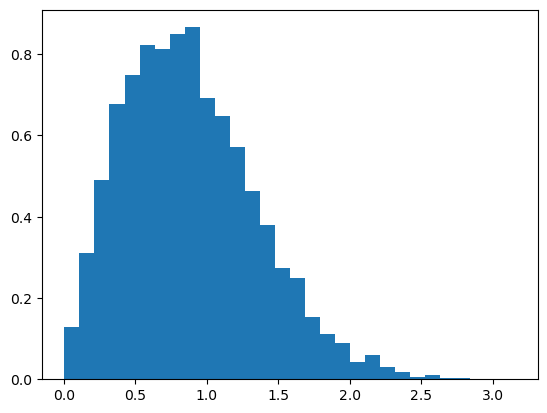

In [23]:

count, bins, ignored = plt.hist( ruido_rayleigh(100,100).flatten(), 30, density=True )


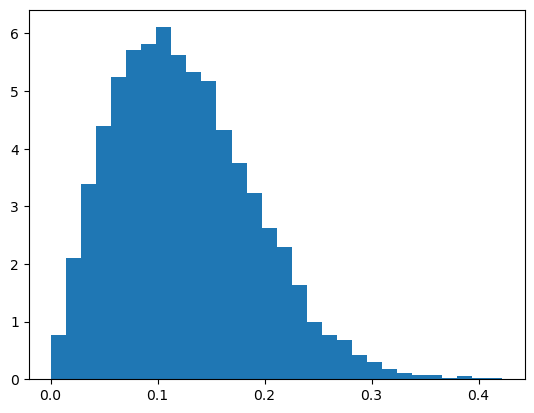

In [31]:
mu, sigma = 0, 0.1
s = np.random.rayleigh(sigma, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)


# Ruido Exponencial

In [32]:
def ruido_gamma(m=1, n=1, a=1):
    k = -1/a
    return k * np.log(1 - np.random.random(size=(m,n)) ) 

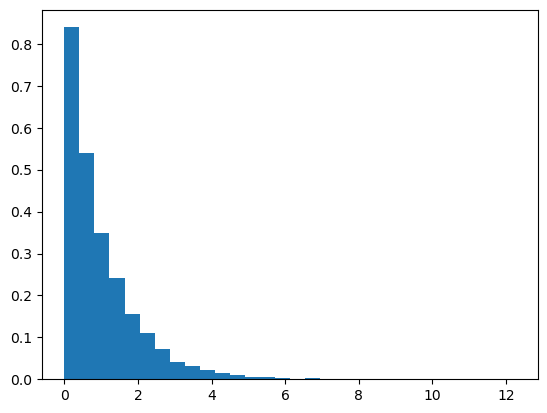

In [33]:
a = 1
s = ruido_gamma(100, 100, a)
count, bins, ignored = plt.hist(s.flatten(), 30, density=True)

# Ruído Erlang

In [34]:
def ruido_erlang(m=1, n=1, a = 1, b = 5):
    R = np.zeros( (m, n) )
    for i in range(b):
        R += ruido_gamma(m,n)
    return R

17.812094059549636


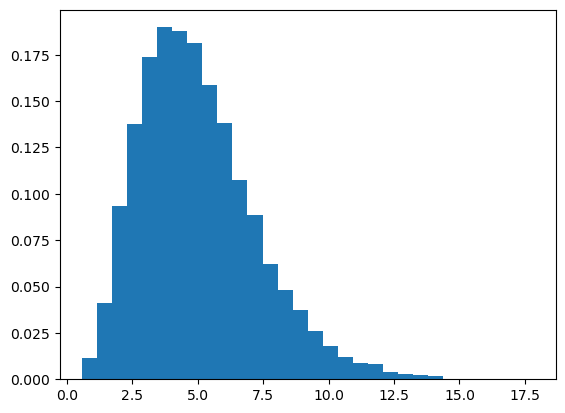

In [35]:
a = 1
s = ruido_erlang(100, 100, a, b=5)
count, bins, ignored = plt.hist(s.flatten(), 30, density=True)
print(np.max(s))

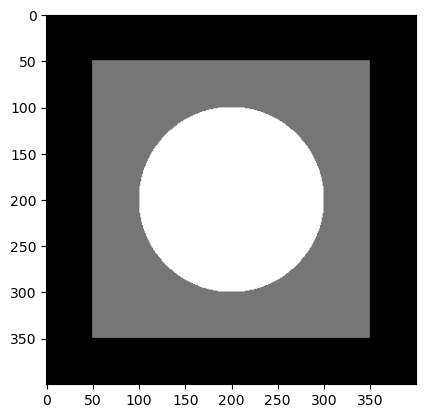

In [36]:
img2 = np.ones((400,400), dtype = "uint8")*60
img2[50:350, 50:350] = 120
x, y = gridFourier(400, 400)
z = np.sqrt(x**2 + y**2)
ind = z < 100
img2[ind] = 190
plt.imshow(img2, cmap='gray')

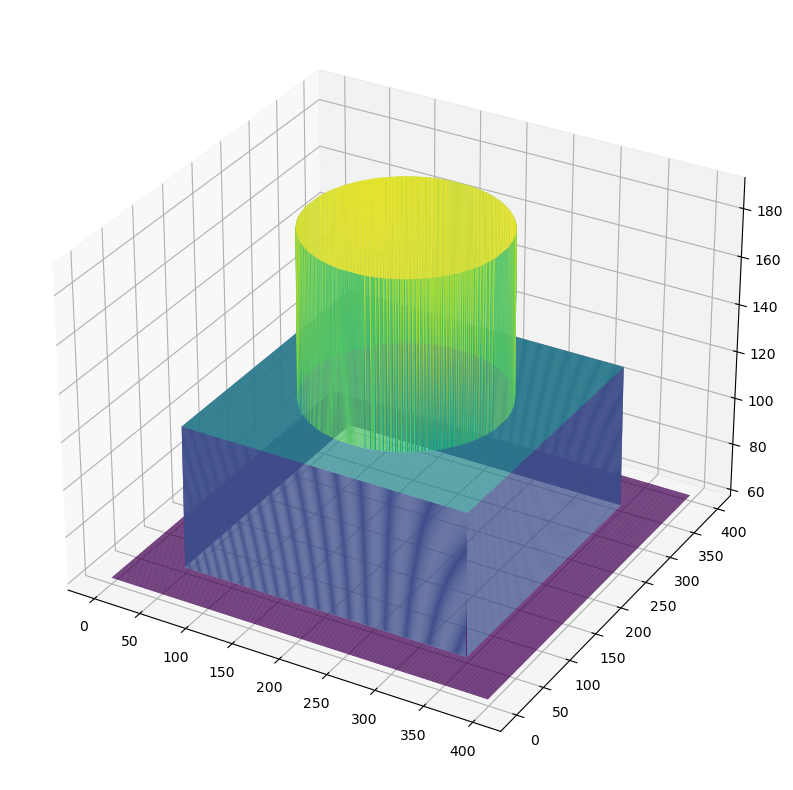

In [42]:
my_mesh(img2)

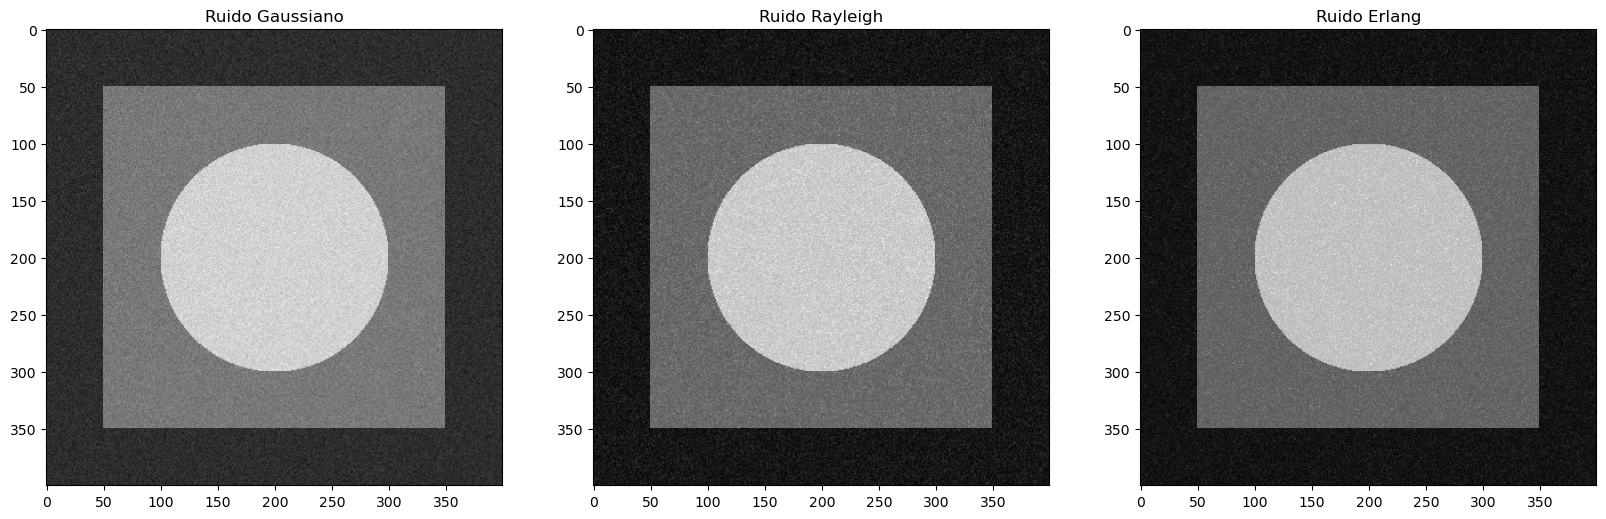

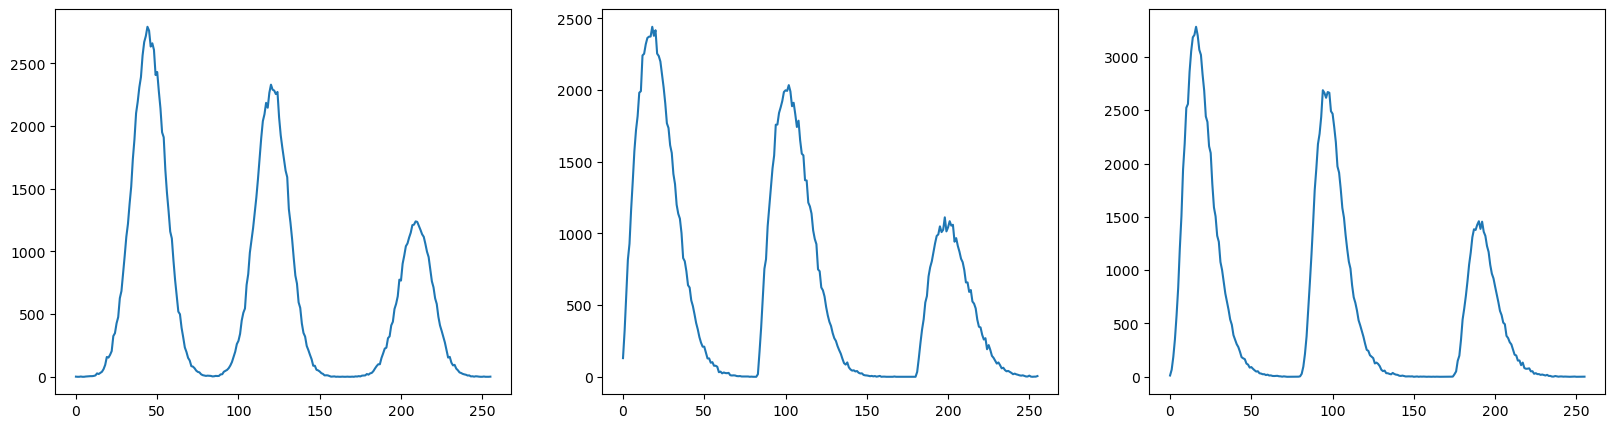

In [38]:
img2_f = img_as_float(img2, force_copy=True)
img_gauss = util.random_noise(img2, 'gaussian', var = 0.001)
img_ray = img2_f + np.random.rayleigh(sigma, size=(400,400))*0.5
img_erl = img2_f + ruido_erlang(400, 400, a=1, b=5)/80
hg, _ = exposure.histogram(img_gauss, nbins=256)
hr, _ = exposure.histogram(img_ray, nbins=256)
he, _ = exposure.histogram(img_erl, nbins=256)

show([img_gauss,img_ray,img_erl], ['Ruido Gaussiano','Ruido Rayleigh','Ruido Erlang'])

f, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].plot(hg)
ax[1].plot(hr)
ax[2].plot(he)

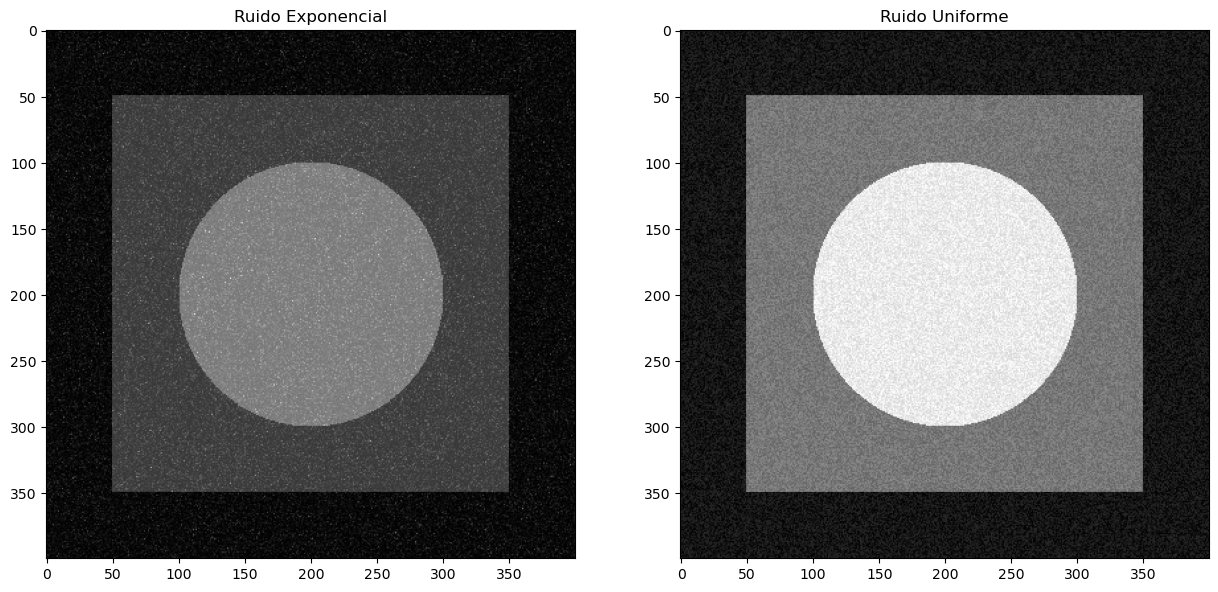

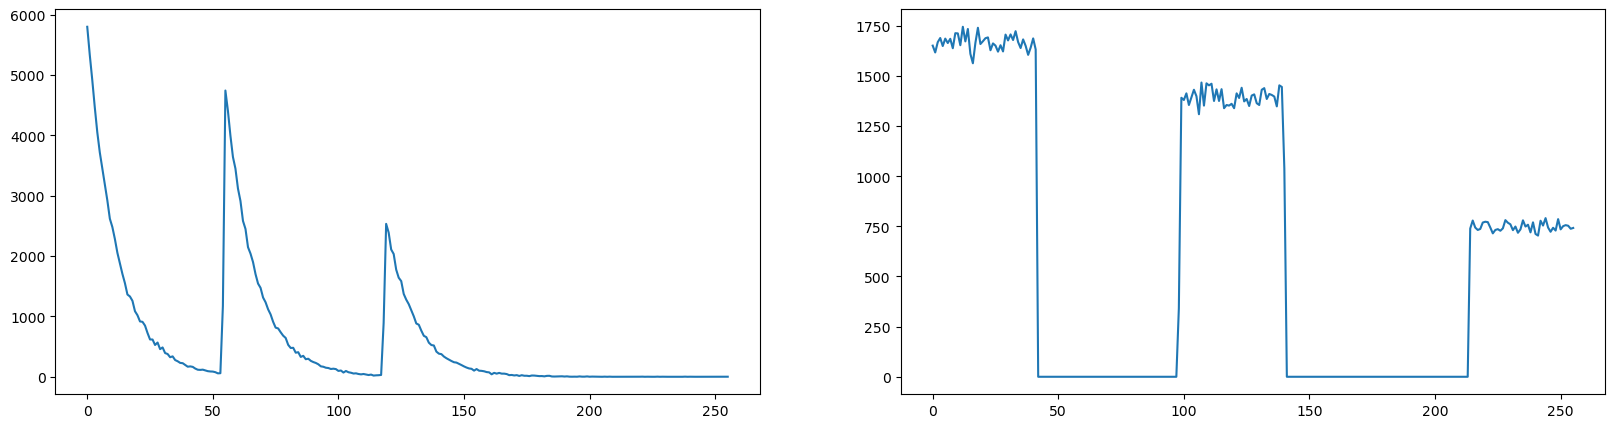

In [39]:
img2_f = img_as_float(img2, force_copy=True)
img_exp = img2_f + ruido_gamma(m=400, n=400, a=2)*0.1
img_uni = img2_f +  np.random.random(size = (400, 400))*0.1

hex, _ = exposure.histogram(img_exp, nbins=256)
hu, _ = exposure.histogram(img_uni, nbins=256)

show([img_exp,img_uni], ['Ruido Exponencial','Ruido Uniforme'])

f, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(hex)
ax[1].plot(hu)


# Filtro das médias

In [41]:
def media_geometrica(img, m=3, n=3):
    imgf = img_as_float(img, force_copy=True)
    eps = np.finfo(float).eps
    nimg = np.exp( ndimage.convolve(np.log(imgf+eps), np.ones((m, n)), mode='reflect' ) ) ** (1/m/n)
    return nimg

In [42]:
def media_harmonica(img, m=3, n=3):
    lin, col = img.shape[:2]
    eps = np.finfo(float).eps
    imgf = img_as_float(img, force_copy=True)
    nimg = (lin * col) / ndimage.convolve(1/(imgf+eps), np.ones((m,n)), mode='reflect' ) 
    return nimg    

min = 1.179894896653167e-11 max = 0.8301334700837423


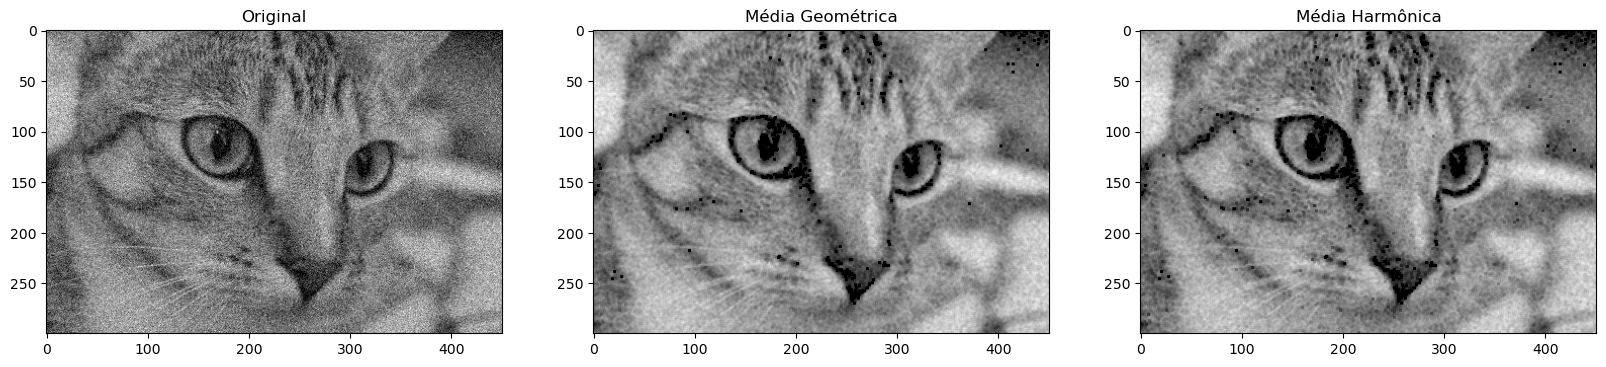

In [43]:
img = data.chelsea()
imgg = color.rgb2gray(img)
img_r = util.random_noise(imgg)



img_geo = media_geometrica(img_r)
img_har = media_harmonica(img_r)

print(f'min = {np.min(img_geo)} max = {np.max(img_geo)}')
show([img_r, img_geo, img_har], ['Original','Média Geométrica','Média Harmônica'])

In [48]:
def gridFourier(M, N):
    u = np.arange(0, M)
    v = np.arange(0, N)
 
    u = u - np.floor(M/2)
    v = v - np.floor(N/2)
    U, V = np.meshgrid(u, v)
    return U, V

In [49]:
def passa_freq(img, mask):
    height, width = img.shape[:2]
    fimg = fft.fftshift( fft.fft2(img) )
    fimg = fimg * mask
    nimg = fft.ifft2(fimg)
    nimg = np.abs(nimg)
    return nimg

# Band-pass filter

In [50]:
def mask_butterworth_band(width, height, d0, n, W):
    U, V = gridFourier(width, height)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + ((D*W)/(D**2 - d0**2))**(2*n))
    return H

C:\Users\Memo\AppData\Local\Temp\ipykernel_47588\1633597750.py:4: RuntimeWarning: divide by zero encountered in true_divide
  H = 1 / (1 + ((D*W)/(D**2 - d0**2))**(2*n))


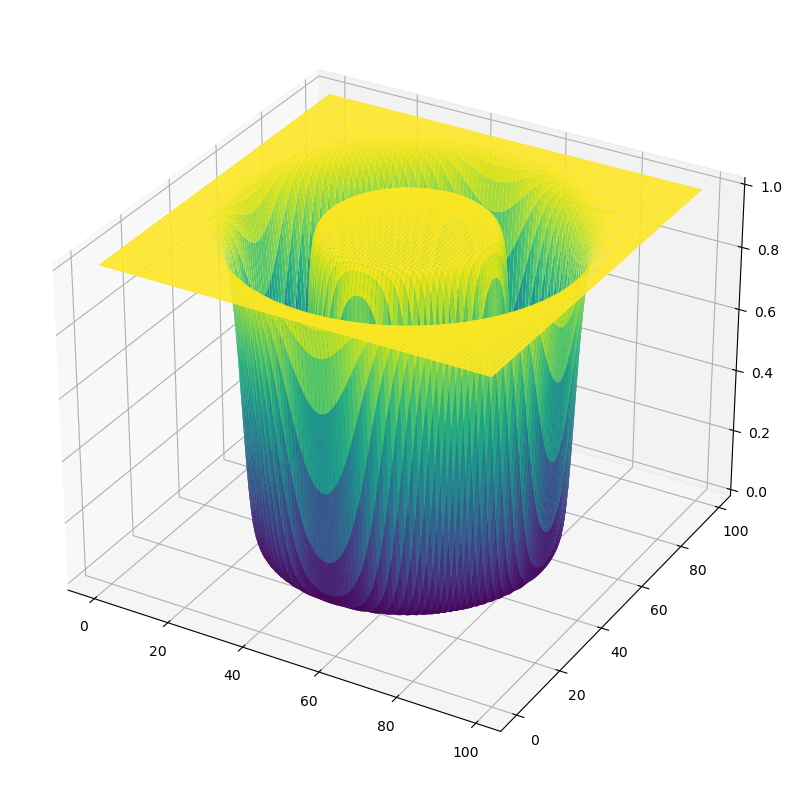

In [51]:
H = mask_butterworth_band(100, 100, 30, 5, 15)
my_mesh(H)

### Notch filter
$$D_1(u,v) = \sqrt{(u - M/2 - u_0)^2 + (v - N/2 - v_0)^2}$$
$$D_2(u,v) = \sqrt{(u - M/2 + u_0)^2 + (v - N/2 + v_0)^2}$$
$$H(u,v) = \frac{1}{1 + \left(\frac{D_0^2}{D_1(u,v)D_2(u,v)}\right)^n}$$


In [52]:
def mask_butterworth_notch(width, height, d0, n, u0, v0):
    U, V = gridFourier(width, height)
    D1 = np.sqrt( (U-u0)**2 + (V-v0)**2 )
    D2 = np.sqrt( (U+u0)**2 + (V+v0)**2 )
    H = 1 / (1 + ( (d0**2)/(D1*D2) )**(n))
    return H

C:\Users\Memo\AppData\Local\Temp\ipykernel_47588\1633597750.py:4: RuntimeWarning: divide by zero encountered in true_divide
  H = 1 / (1 + ((D*W)/(D**2 - d0**2))**(2*n))
C:\Users\Memo\AppData\Local\Temp\ipykernel_47588\2176214003.py:5: RuntimeWarning: divide by zero encountered in true_divide
  H = 1 / (1 + ( (d0**2)/(D1*D2) )**(n))


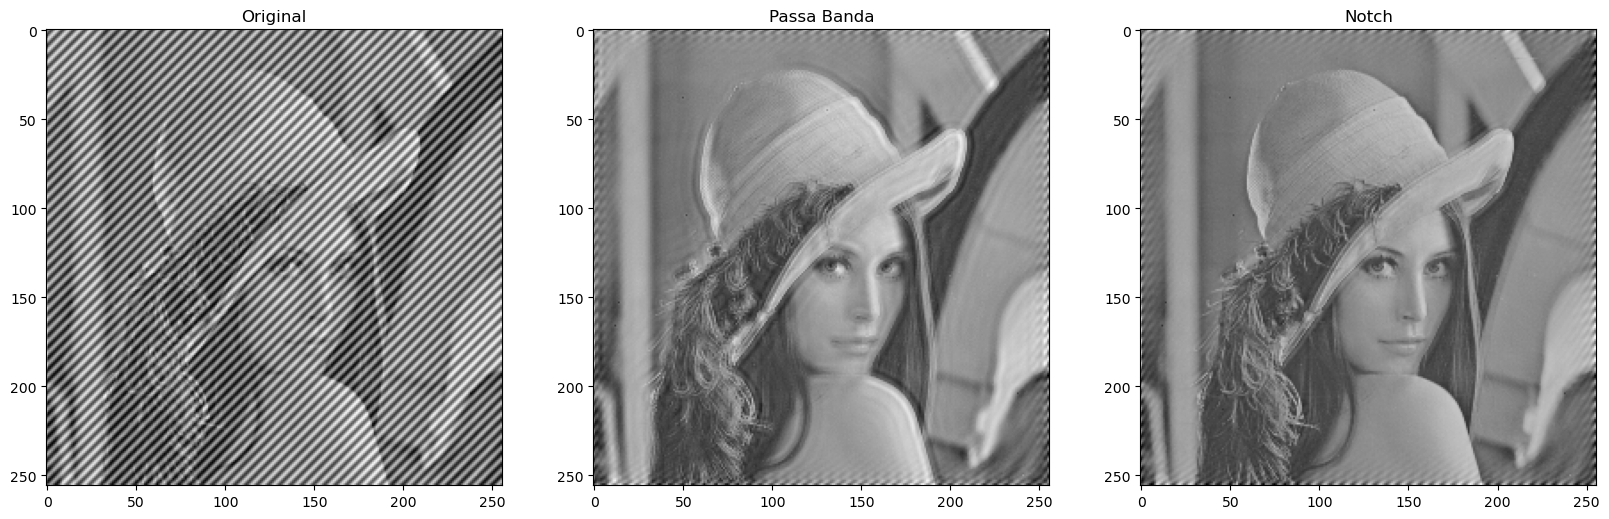

In [53]:
img = io.imread('D://Dropbox//UFOP//BCC326//test//png//lenna_periodico2.png', as_gray=True)
lin, col = img.shape[:2]
HB = mask_butterworth_band(col, lin, 55, 5, 30)
nimg_band = passa_freq(img, HB)

HN = mask_butterworth_notch(col, lin, 50, 10, 40, 40)
nimg_notch = passa_freq(img, HN)

show([img, nimg_band, nimg_notch], ['Original','Passa Banda', 'Notch'])
#plt.imshow(HN, cmap='gray')

# Convolução 

In [54]:
def convFreq(img, mask):
    img_f = img_as_float(img, force_copy=True)
    lin, col = img.shape[:2]
    maskF = np.zeros( (lin, col) )
    maskF[:mask.shape[0], :mask.shape[1]] = mask
    nimg = fft.fft2(img) * fft.fft2(maskF)
    nimg = np.abs( fft.ifft2(nimg) )
    return nimg

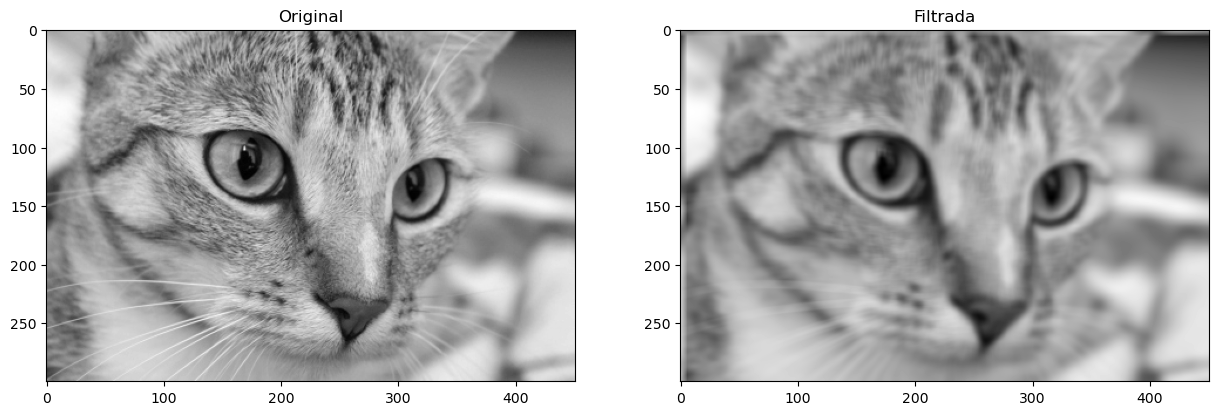

In [55]:
img = data.chelsea()
img = color.rgb2gray(img)
mask = np.ones( (7,7) ) / 49
nimg = convFreq(img, mask)
show([img, nimg],['Original', 'Filtrada'])

# Filtragem Inversa

In [56]:
def filtroInverso(img, mask):
    img_f = img_as_float(img, force_copy=True)
    lin, col = img.shape[:2]
    maskF = np.zeros( (lin, col) )
    maskF[:mask.shape[0], :mask.shape[1]] = mask
    H = fft.fft2(maskF)
    nimg = fft.fft2(img) * (1/H)
    nimg = np.abs( fft.ifft2(nimg) )
    return nimg

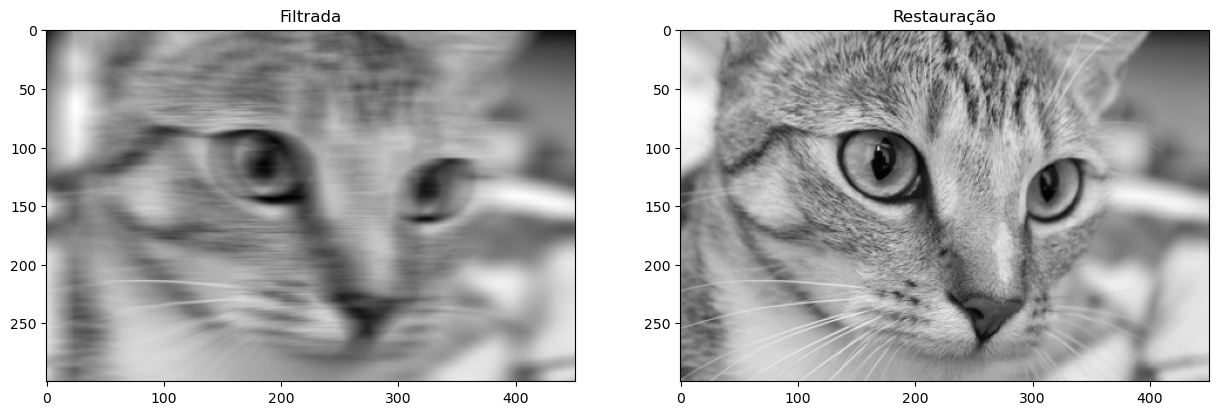

In [57]:
mask = np.ones( (1,25) )
nimg = convFreq(img, mask)
nimg2 = filtroInverso(nimg, mask)
show([nimg, nimg2],['Filtrada', 'Restauração'])

# Wiener filter

In [58]:
def wiener(img, mask, k):
    G = fft.fft2(img)
    lin, col = img.shape[:2]
    maskF = np.zeros( (lin, col) )
    maskF[:mask.shape[0], :mask.shape[1]] = mask    
    H = fft.fft2(maskF)
    Fp = ( np.conjugate(H) / (np.abs(H)**2 + k) ) * G
    nimg = np.abs( fft.ifft2(Fp) )
    return nimg

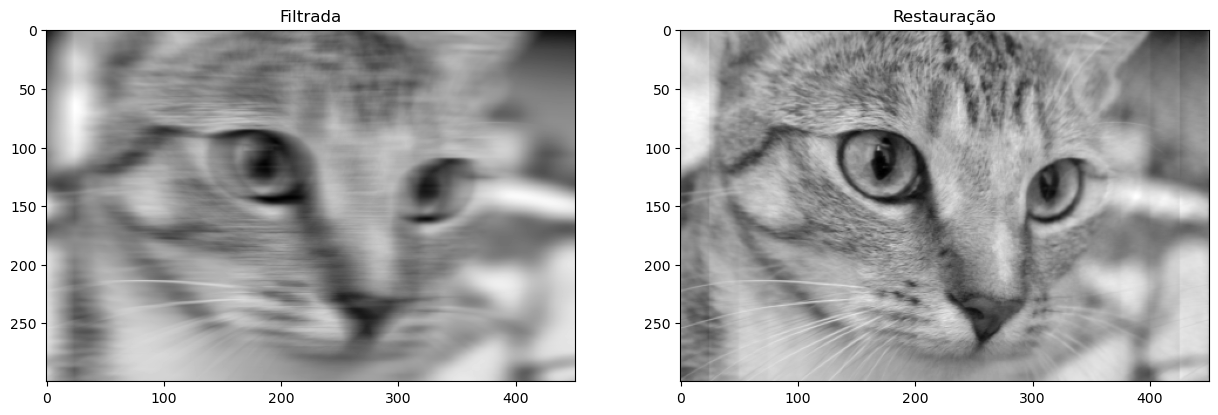

In [59]:
mask = np.ones( (1,25) )
nimg = convFreq(img, mask)
nimg2 = wiener(nimg, mask, k = 1)
show([nimg, nimg2],['Filtrada', 'Restauração'])

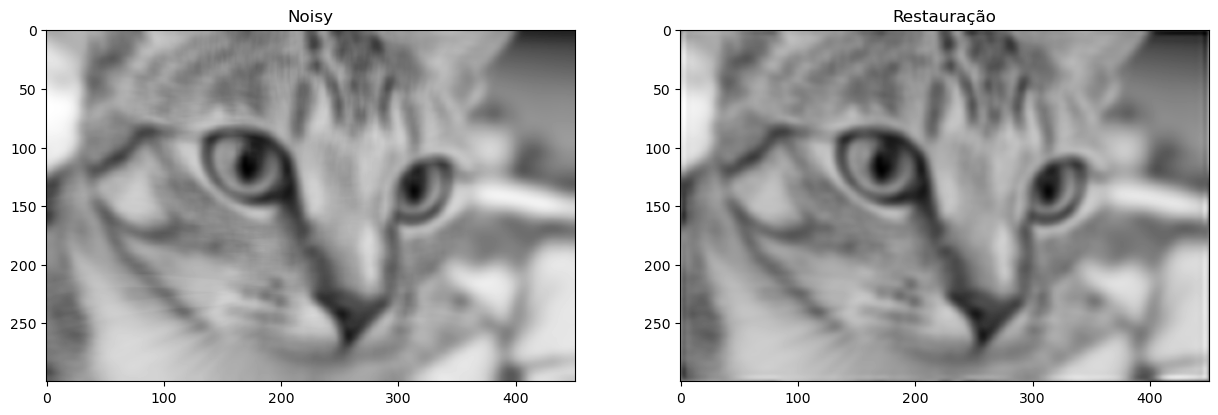

In [60]:
mask7 = np.ones( (11,11) ) / 121
mask5 = np.ones( (5,5) ) / 25
nimg2 = ndimage.convolve(img, mask7)
nimg3 = restoration.wiener(nimg2, mask5, 1)
show([nimg2, nimg3],['Noisy', 'Restauração'])